In [1]:
import json
import pandas as pd

jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [1]:
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *

data_lm = load_data("", "data_export.pkl", bs=50)
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [2]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
"xxbos mia farrow : ' it 's possible my son was fathered by frank sinatra , mario puzo , george mcgovern , robert altman , anthony perkins , milton berle , robert redford , michael xxunk , danny aiello , or bruce dern '",1
"xxbos xxunk leonard , modern prose master , noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words , unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1
"xxbos ' it 's step , twist , step , dammit ! ' yells leotard - wearing , cigarette - smoking john kelly while choreographing upcoming military parade",1
"xxbos ' insane ' as today 's u.s .- russia situation may be , trump and putin do n't matter to fx 's ' the americans '",0


In [3]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.6, callback_fns=ShowGraph)
learn.load_encoder('learn-stage2-enc')

#Stage-1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


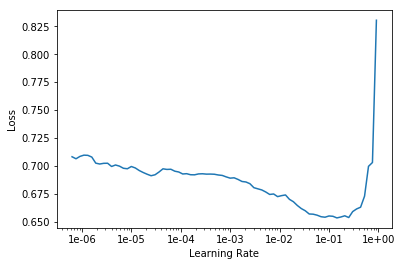

In [4]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.566017,0.531164,0.722984,00:11
1,0.566520,0.520730,0.734824,00:11
2,0.556294,0.514991,0.738019,00:11
3,0.553357,0.512694,0.740650,00:11
4,0.550485,0.506578,0.739899,00:11
5,0.553826,0.518381,0.731441,00:11
6,0.548022,0.511286,0.739711,00:11
7,0.559476,0.523276,0.732381,00:11
8,0.561015,0.528276,0.724676,00:11
9,0.556158,0.516540,0.733321,00:11


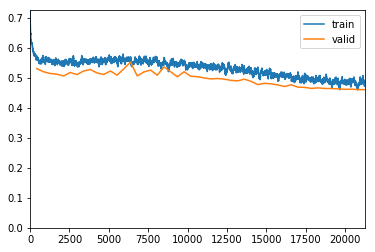

Better model found at epoch 0 with valid_loss value: 0.5311642289161682.
Better model found at epoch 1 with valid_loss value: 0.5207295417785645.
Better model found at epoch 2 with valid_loss value: 0.5149913430213928.
Better model found at epoch 3 with valid_loss value: 0.5126936435699463.
Better model found at epoch 4 with valid_loss value: 0.5065780282020569.
Better model found at epoch 21 with valid_loss value: 0.5039210319519043.
Better model found at epoch 25 with valid_loss value: 0.5000618696212769.
Better model found at epoch 26 with valid_loss value: 0.49679622054100037.
Better model found at epoch 28 with valid_loss value: 0.4960376024246216.
Better model found at epoch 29 with valid_loss value: 0.49199965596199036.
Better model found at epoch 30 with valid_loss value: 0.4902108311653137.
Better model found at epoch 32 with valid_loss value: 0.48872658610343933.
Better model found at epoch 33 with valid_loss value: 0.4778022766113281.
Better model found at epoch 36 with vali

In [5]:
learn.fit_one_cycle(50, 2e-2, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [6]:
learn.save("learn-clas-stage1")
learn.save_encoder("learn-clas-stage1-enc")

#Stage-2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


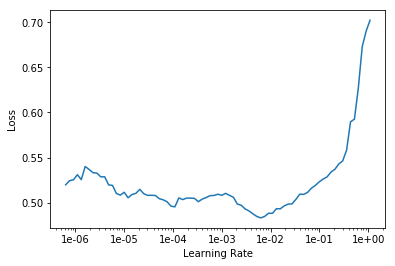

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.452430,0.421744,0.799098,00:32
1,0.398362,0.385324,0.822778,00:33
2,0.350265,0.352159,0.842135,00:34
3,0.322478,0.331626,0.855102,00:34
4,0.255153,0.313850,0.864499,00:33
5,0.219902,0.329632,0.871453,00:32
6,0.192525,0.359601,0.866942,00:33
7,0.147507,0.373723,0.872017,00:32
8,0.123356,0.357841,0.875775,00:33
9,0.128928,0.395065,0.868446,00:32


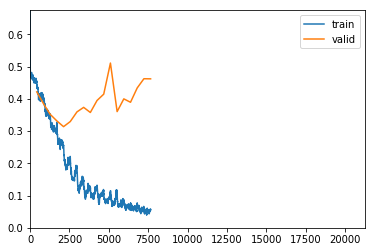

Better model found at epoch 0 with valid_loss value: 0.42174363136291504.
Better model found at epoch 1 with valid_loss value: 0.38532447814941406.
Better model found at epoch 2 with valid_loss value: 0.35215863585472107.
Better model found at epoch 3 with valid_loss value: 0.3316260278224945.
Better model found at epoch 4 with valid_loss value: 0.3138502836227417.


KeyboardInterrupt: 

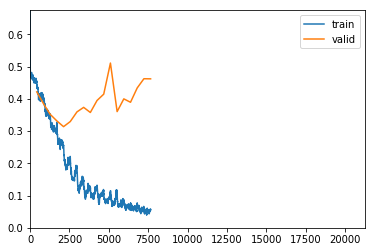

In [8]:
learn.fit_one_cycle(50, 3e-3, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [9]:
learn.save("learn-clas-stage2")
learn.save_encoder("learn-clas-stage2-enc")

#Stage-3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


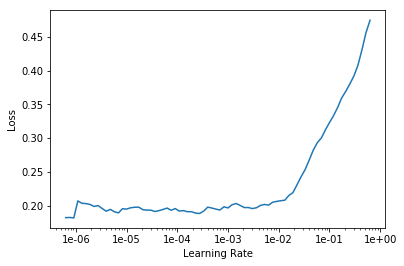

In [12]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.182582,0.312561,0.867318,00:32
1,0.184042,0.309474,0.869385,00:32
2,0.169962,0.306731,0.871077,00:32
3,0.161227,0.303294,0.872204,00:34
4,0.168973,0.304096,0.874084,00:33
5,0.149616,0.304318,0.874084,00:33
6,0.140408,0.307912,0.874460,00:34
7,0.126223,0.317902,0.872956,00:33
8,0.134076,0.323493,0.878030,00:32
9,0.113758,0.328293,0.875399,00:33


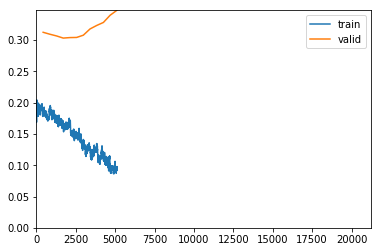

Better model found at epoch 0 with valid_loss value: 0.31256091594696045.
Better model found at epoch 1 with valid_loss value: 0.30947408080101013.
Better model found at epoch 2 with valid_loss value: 0.30673137307167053.
Better model found at epoch 3 with valid_loss value: 0.3032936751842499.


KeyboardInterrupt: 

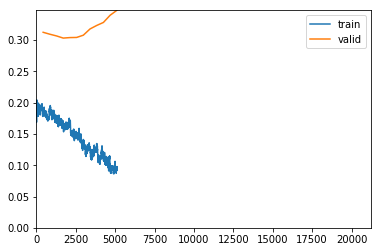

In [13]:
learn.fit_one_cycle(50, 1e-4, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [15]:
learn.save("learn-clas-stage3")
learn.save_encoder("learn-clas-stage3-enc")

#Stage-3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


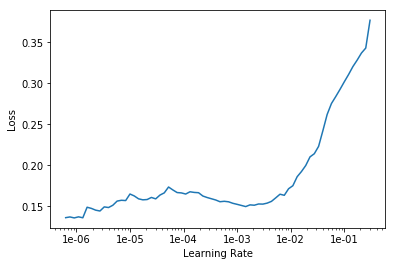

In [16]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.132862,0.314048,0.875211,00:33
1,0.141129,0.316035,0.874084,00:33
2,0.135937,0.315145,0.875211,00:34
3,0.140231,0.312123,0.876151,00:34
4,0.134054,0.315657,0.875587,00:33
5,0.147926,0.314137,0.876151,00:33
6,0.131340,0.311307,0.876151,00:33
7,0.122506,0.313713,0.874460,00:34
8,0.132820,0.313147,0.875963,00:32
9,0.137568,0.316192,0.876339,00:32


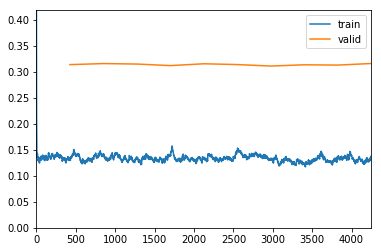

Better model found at epoch 0 with valid_loss value: 0.3140476644039154.
Better model found at epoch 3 with valid_loss value: 0.31212255358695984.
Better model found at epoch 6 with valid_loss value: 0.31130746006965637.


In [18]:
learn.fit_one_cycle(10, 1e-6, callbacks=[SaveModelCallback(learn, monitor="valid_loss", mode="min")])

In [19]:
learn.predict("Man Annoyed At Being Mistaken For Employee Just Because He Driving Forklift Through Store")

(Category 1, tensor(1), tensor([0.0029, 0.9971]))

In [20]:
learn.save_encoder("0.6-drop-enc")